Authors: Yvette Lin, Angela Gao, Katie Bouman

In [8]:
import ehtim as eh # installed using https://github.com/achael/eht-imaging
import ehtplot.color # installed using https://github.com/liamedeiros/ehtplot (only necessary if you want cfun="afmhot_10us", the colormap used in EHT papers)
import matplotlib.pyplot as plt
import numpy as np

# Input Parameters

In [9]:
input_filename = 'data/img64_mad_a0.94_i30_variable_pa1_noscattering.npy'
output_filename = 'data/test.fits'

flux = 1            # total flux of the image in Janskys (Jy). M87 has a flux of around 1, Sgr A* has a flux of around 2
object_name = 'M87' # the source you are observing 

# the right ascension (ra) in fractional hours and source declination (dec) in fractional degrees    
if object_name == "M87":
    ra = 12.513728717168174 
    dec = 12.39112323919932 
elif object_name == "SgrA":
    ra = 17.761121055553343 
    dec = -29.00784305556  

# the field of view of the image in radians. 
# This depends on the image you use In this tutorial, ...
if object_name == 'M87':
    fov = 128.0 * eh.RADPERUAS  # chosen to ring that is 40 uas for the example 64x64 image
elif object_name == 'SgrA':
    fov = 160.0 * eh.RADPERUAS  # chosen to ring that is 50 uas for the example 64x64 image

# Load the image data

In [10]:
# get the image data from the numpy array. you could also load data in a different way, for instance from a png
data = np.load(input_filename) 
image = data[0]

# get the size of the image (assuming a square image here)
image_size = image.shape[0] 

# Create image object

In [11]:
# normalize the image so it matches the desired total flux. each pixel has units Jy/pixel
image = (image/np.sum(image) ) * flux 

# create the image object
im = eh.image.Image(image, psize=fov / float(image_size), ra=ra, dec=dec, source=object_name)

## some useful properties of the image object:

im.source : name of source you are observing <br>
im. ra / im.dec : the right-ascension and declanation of the source you are observing <br>
im.imvec: to access the vectorized image <br>
im.xdim / im.ydim: the number of pixels in the x/y direction <br>
im.psize : the pixel size in radians <br>
im.fovx() / im.fovy() : the field of view in radians <br>

field of view:
128.0
128.0


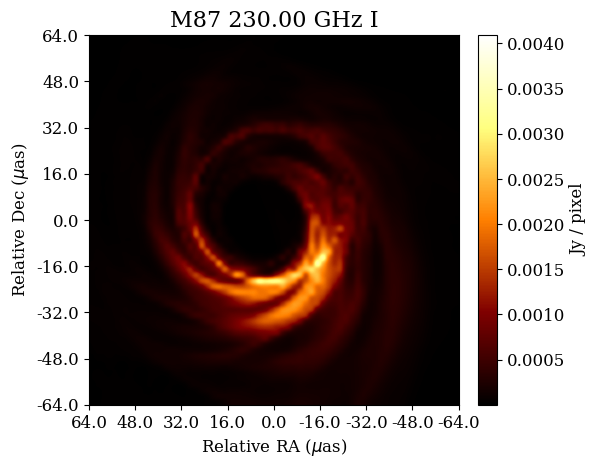

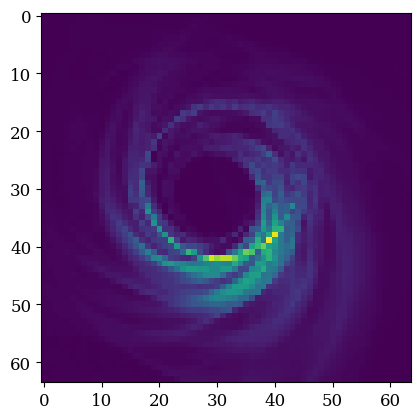

In [12]:
# print the field of view (fov) in micro-arcseconds
print('field of view:')
print(im.psize*im.xdim / eh.RADPERUAS)
print(im.fovx() / eh.RADPERUAS)

# display the image
im.display() #use the argument cfun="afmhot_10us" to use the same colormap as in the EHT papers

#display the image by plotting what is in im.imvec. it will appear flipped
plt.imshow(np.reshape(im.imvec, (im.ydim,im.xdim))) 

# make a copy of the image object
im2 = im.copy()

## Save eht image to fits file

In [13]:
im.save_fits(output_filename)

## Save pdfs of the image displyed in different ways

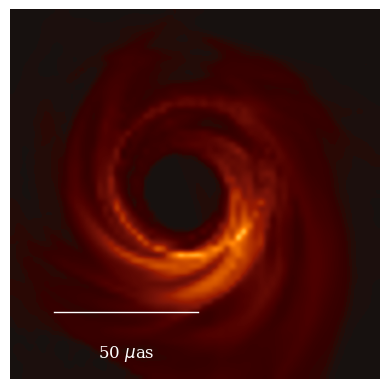

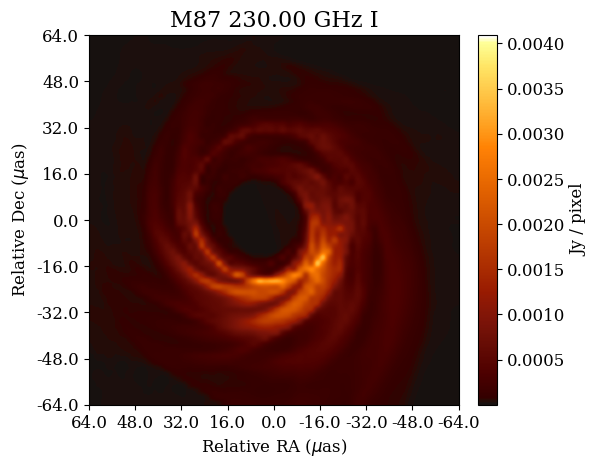

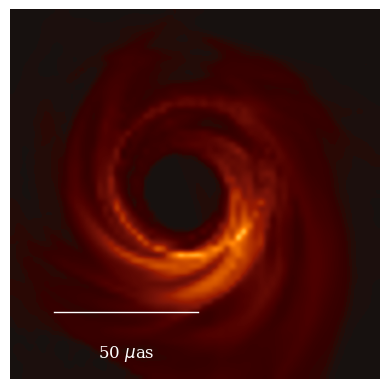

In [14]:
im.display(export_pdf = "test_image_1.png", show=False, cfun="afmhot_10us") # to output the images
im.display(export_pdf = "test_image_2.png", show=False, cfun="afmhot_10us", label_type='scale', has_cbar=False, has_title=False) # to output the images